In [1]:
from img_doc.document import Document, Page

2024-02-22 12:39:19.685842: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 12:39:19.722057: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 12:39:19.722090: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 12:39:19.723209: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 12:39:19.729036: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 12:39:19.729739: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
page = Page()



page.set_from_path("img/10.png")

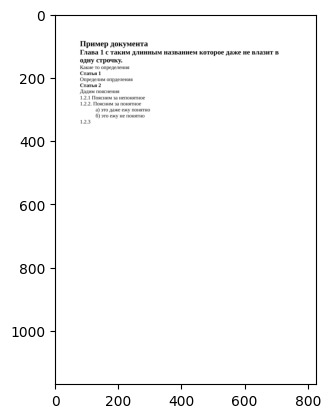

In [3]:
page.image.plot()

In [4]:
page.extract_word()

In [5]:
from img_doc.document.page.word.word_bold_extractor import PsBoldExtractor
from img_doc.image.editors import ValleyEmphasisBinarizer


In [6]:
ps_ext = PsBoldExtractor()
binarizer = ValleyEmphasisBinarizer()

In [10]:
ocen = []
gray_image = binarizer.binarize(page.image.img)
for word in page.words:
    ocen.append(ps_ext.evaluation_words(word.segment.get_segment_from_img(gray_image)))

In [11]:
import numpy as np

In [57]:
rez = []
array_k = np.linspace(2, 0.5, 20)
page.set_from_path("img/10.png")
page.extract_word()
N = len(page.words)
M = len(array_k)
rez = np.zeros((N, M))
for j, k in enumerate(array_k):
    page.set_from_path("img/10.png")
    page.extract_word()
    page.resize(k)
    
    gray_image = binarizer.binarize(page.image.img)
    for i, word in enumerate(page.words):
        rez[i][j] = ps_ext.evaluation_words(word.segment.get_segment_from_img(gray_image))

In [58]:
import matplotlib.pyplot as plt

(2.0, 0.5)

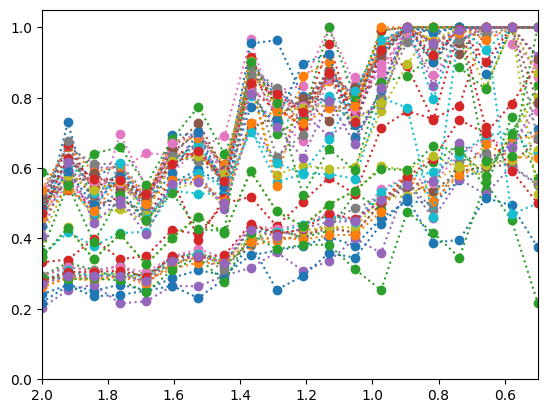

In [68]:
for i in range(N):
    plt.plot(array_k, rez[i,:], ':o')
plt.ylim([0, 1.05])
plt.xlim([2, 0.5])

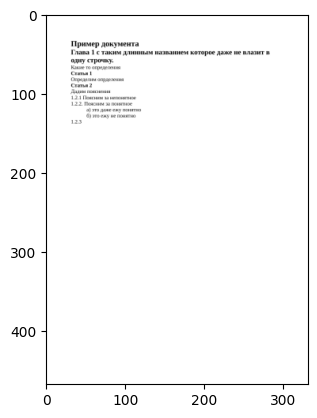

In [56]:
page.set_from_path("img/10.png")
page.extract_word()
page.resize(0.4)
page.image.plot()